# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

----
### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>
---
### Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>


---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import (load_data, print_dataset_info, split_dataset, 
                              auto_scatter_simple,load_dataset,detect_outliers,
                              one_hot_dataframe)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

pd.set_option('display.width', 140)
pd.set_option('precision', 4)

sns.set_style("whitegrid")

sns.set_palette(sns.color_palette("muted", 15))

In [2]:
load_app_config()
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
input_path = get_datafolder_path()

train_file = os.path.join(input_path, DIRECTORY, TRAIN_FILE)
test_file = os.path.join(input_path, DIRECTORY, TEST_FILE)
print(train_file)
print(test_file)

train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(train_file,RESPONSE)
test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars  = load_dataset(test_file,RESPONSE,colseparator=',')

train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]
test_X  = test_dataset[tfeature_columns]

Adding D:\DataSource  to system path
Adding D:\MachineLearning  to system path
D:\DataSource\kaggle_titanic\train.csv
D:\DataSource\kaggle_titanic\test.csv
 input file is :D:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
 input file is :D:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations

In [3]:
#Outliers_to_drop = detect_outliers(train_dataset,2,["Age","SibSp","Parch","Fare"])
#train_dataset.loc[Outliers_to_drop] # Show the outliers rows
#Outliers_to_drop

In [4]:
#train_dataset = train_dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
#train_y = train_dataset[response_column]
#print(train_dataset.shape)
#print(train_y.shape)
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*35,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*35,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*35,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-X"))
    print(X.describe())
        
    print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*35,"value_count-y"))
 
    print(y.groupby(response_column)[response_column].count())
    
    print("<{0} {1} {0}>".format("="*35,"Survived Percentage"))
    print(y.groupby(response_column)[response_column].count()/len(y))
    
    

display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)

check_null = train_dataset.isnull().sum()[train_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*50,"null value count"))
print(check_null)


<=================================== info ===================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<=================================== feature columns ===================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<=================================== response ===================================>
['Survived']
<=================================== Des

In [6]:
input_dataset =train_dataset
print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-Survived"))
print(input_dataset[input_dataset['Survived']==1].describe())
print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-Survived-male"))
print(input_dataset[(input_dataset['Survived']==1)& (input_dataset['Sex']=='male')].describe())
print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-Survived-female"))
print(input_dataset[(input_dataset['Survived']==1)& (input_dataset['Sex']=='female')].describe())
print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-Dead"))
print(input_dataset[input_dataset['Survived']==0].describe())
print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-Survived-male"))
print(input_dataset[(input_dataset['Survived']==0)& (input_dataset['Sex']=='male')].describe())
print("<{0} {1} {0}>".format("="*35,"Descriptive Statistics-Survived-female"))
print(input_dataset[(input_dataset['Survived']==0)& (input_dataset['Sex']=='female')].describe())

<=================================== Descriptive Statistics-Survived ===================================>
       PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
count     342.0000     342.0  342.0000  290.0000  342.0000  342.0000  342.0000
mean      444.3684       1.0    1.9503   28.3437    0.4737    0.4649   48.3954
std       252.3588       0.0    0.8633   14.9510    0.7087    0.7717   66.5970
min         2.0000       1.0    1.0000    0.4200    0.0000    0.0000    0.0000
25%       250.7500       1.0    1.0000   19.0000    0.0000    0.0000   12.4750
50%       439.5000       1.0    2.0000   28.0000    0.0000    0.0000   26.0000
75%       651.5000       1.0    3.0000   36.0000    1.0000    1.0000   57.0000
max       890.0000       1.0    3.0000   80.0000    4.0000    5.0000  512.3292
<=================================== Descriptive Statistics-Survived-male ===================================>
       PassengerId  Survived    Pclass      Age     SibSp     Parch     

#### Few points  to be  noted
###### Age ,Cabin,Embarked has null values 

In [7]:
#Capture few variables that can be used in data cleaning 
max_age = train_dataset['Age'].max()
min_age = train_dataset['Age'].min()

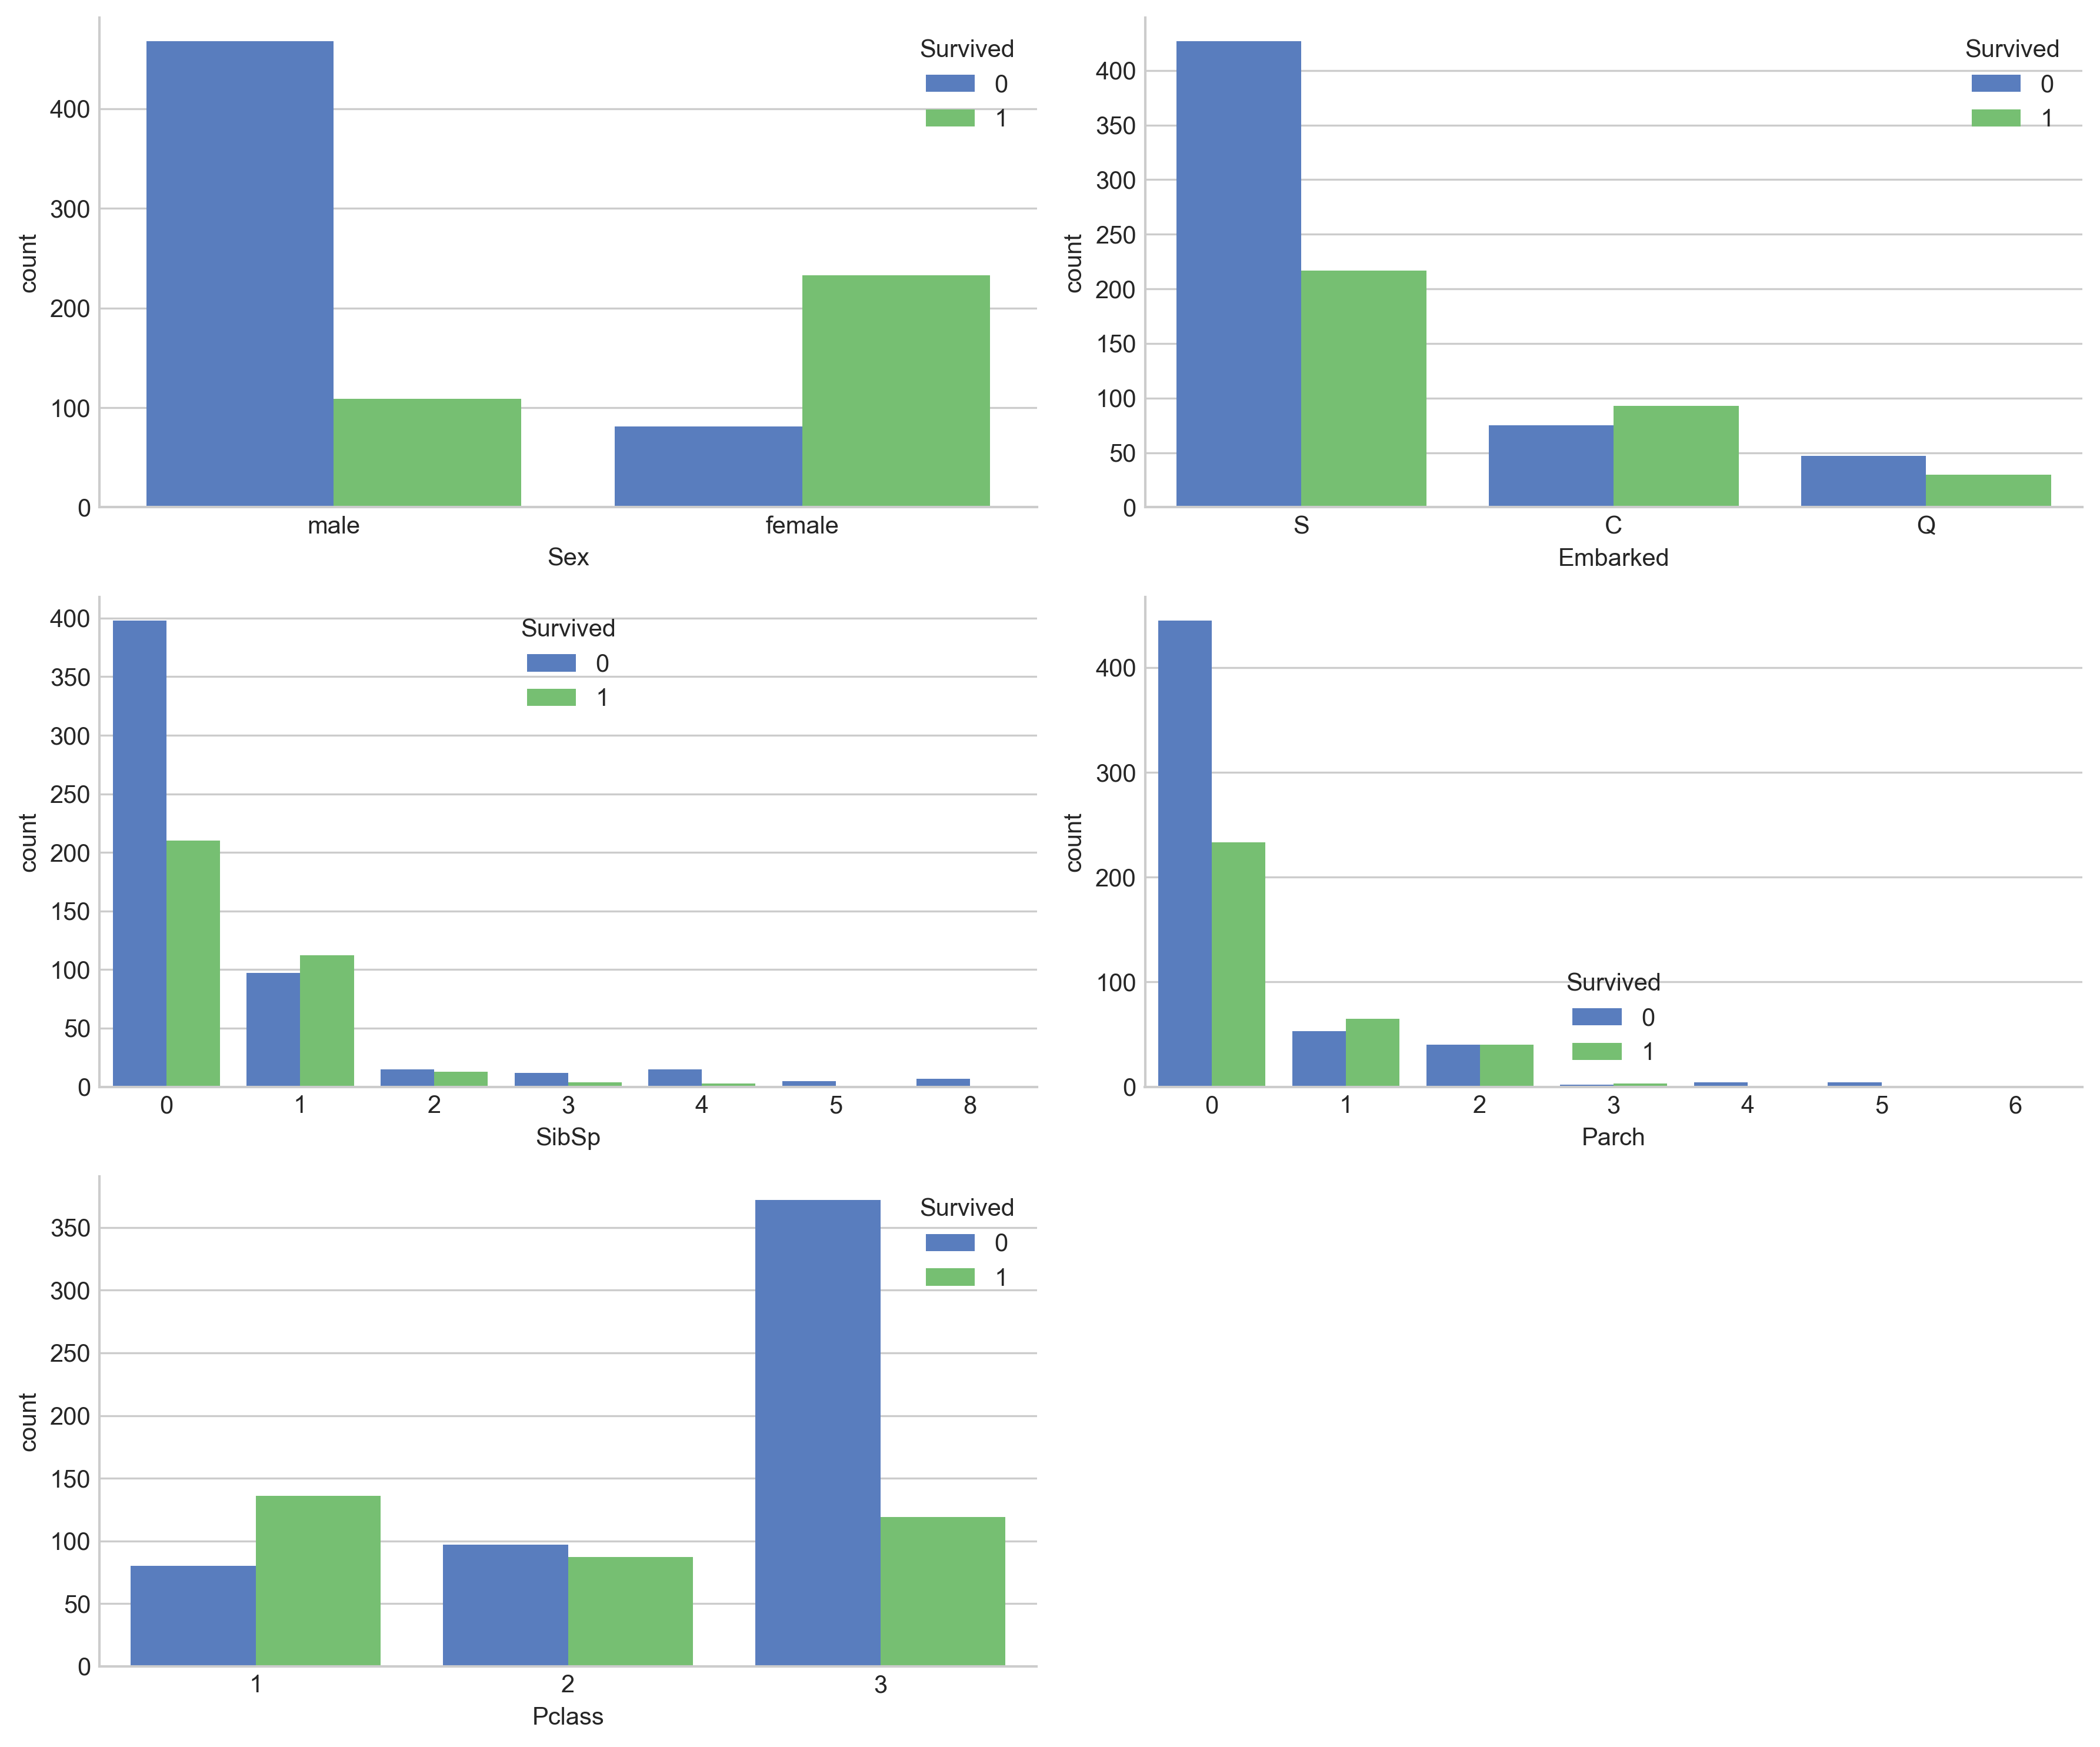

In [8]:
categorical = ['Sex', 'Embarked','SibSp','Parch','Pclass']
def count_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(12,10),dpi=300)
    size =len(categorical)
     
    for i in range(size):
        ax = fig.add_subplot(3, 2, i+1)
        sns.countplot(x=categorical[i], hue="Survived", data=train_dataset,ax=ax)
        sns.despine()
    plt.tight_layout()
    plt.show()
count_plots(train_dataset,categorical)

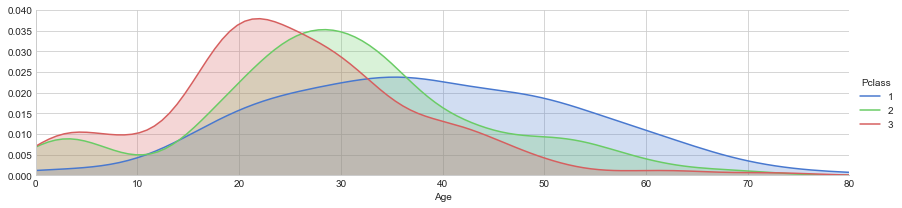

In [9]:
age_dist_by_class = sns.FacetGrid(train_dataset,hue='Pclass', aspect=4, hue_order=[1,2,3] )
age_dist_by_class.set(xlim=(0,max_age))
age_dist_by_class.set(ylim=(0,0.04))
age_dist_by_class.map(sns.kdeplot,'Age', shade=True)
age_dist_by_class.add_legend()

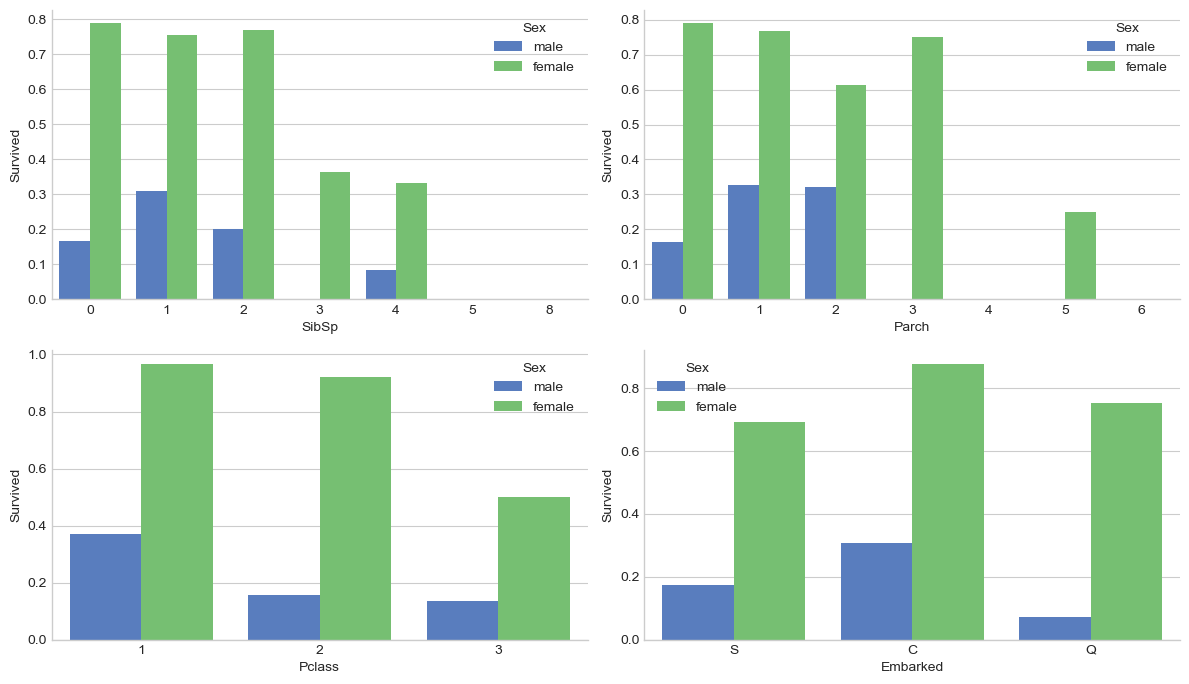

Check if SibSp and Parch can be combined to form a new feature
Passenger class 3 has least chance of survival


In [10]:
bar_categories = ['SibSp','Parch','Pclass','Embarked']
def bar_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(12,10),dpi=100)
    size =len(categorical)
     
    for i in range(size):
        ax = fig.add_subplot(3, 2, i+1)
        sns.barplot(x=bar_categories[i], y="Survived", hue="Sex",data=train_dataset,ax=ax,ci=None)
        sns.despine()
    plt.tight_layout()
    plt.show()
bar_plots(train_dataset,bar_categories)
print("Check if SibSp and Parch can be combined to form a new feature")
print("Passenger class 3 has least chance of survival")

Family size > 3 have less chance of survival


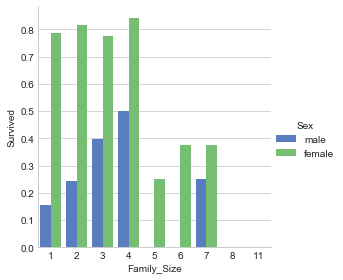

In [11]:
train_dataset['Family_Size'] =train_dataset["SibSp"] +train_dataset["Parch"] + 1
sns.factorplot(x="Family_Size", y="Survived",hue="Sex", kind ='bar', data=train_dataset,
               ci=None,legend_out=True,size =4,aspect=1)
sns.despine()
print("Family size > 3 have less chance of survival")

---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms

In [12]:
full_dataset =pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)  

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [13]:
### fill null embarked with 'S'
full_dataset['Embarked'].fillna('S' ,inplace =True)
full_dataset['Family_Size'] =full_dataset["SibSp"] +full_dataset["Parch"] + 1

In [14]:
fare_median =full_dataset[(full_dataset['Pclass'] ==3  ) & 
                  (full_dataset['Sex'] == 'male'  ) &
                  (full_dataset['Age'] >= 50  )
               ]['Fare'].median()

print(fare_median)
full_dataset.loc[full_dataset['Fare'].isnull(),'Fare']= fare_median

7.75


##### Create new feature - Title

In [15]:
full_dataset['Title'] = full_dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand =False)
print(full_dataset['Title'].unique())
full_dataset['Title'] = full_dataset['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Dona','Don'], 'Other')
full_dataset['Title'] = full_dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'],'Officer')
full_dataset['Title'] = full_dataset['Title'].replace('Mlle', 'Miss')
full_dataset['Title'] = full_dataset['Title'].replace('Ms', 'Miss')
full_dataset['Title'] = full_dataset['Title'].replace('Mme', 'Mrs')

train_dataset['Title'] = train_dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand =False)
print(train_dataset['Title'].unique())
train_dataset['Title'] = train_dataset['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Dona','Don'], 'Other')
train_dataset['Title'] = train_dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'],'Officer')
train_dataset['Title'] = train_dataset['Title'].replace('Mlle', 'Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Ms', 'Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Mme', 'Mrs')

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


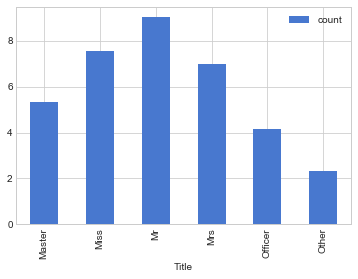

In [16]:
title_dataset =full_dataset[~full_dataset['Survived'].isnull()]
title_dataset =title_dataset.groupby(['Title'])['Survived'].agg(['count'])
title_dataset['count'] =np.log2(title_dataset['count'])
title_dataset.plot.bar()

In [17]:
full_dataset['Cabin'].fillna('XXX' ,inplace=True)
full_dataset['Deck_Level'] =full_dataset['Cabin'].apply(lambda x : x[0]) 

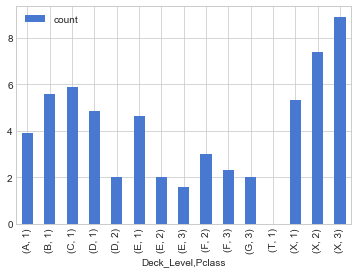

In [18]:
cabin_dataset =full_dataset[~full_dataset['Survived'].isnull()]
cabin_dataset =cabin_dataset.groupby(['Deck_Level','Pclass'])['Survived'].agg(['count'])
cabin_dataset['count'] =np.log2(cabin_dataset['count'])
cabin_dataset.plot.bar()


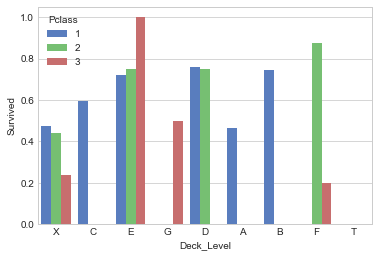

In [19]:
sns.barplot(x="Deck_Level", y="Survived", hue="Pclass", data=full_dataset[~full_dataset['Survived'].isnull()],ci=None )

In [20]:
check_null = full_dataset.isnull().sum()[full_dataset.isnull().sum()>0] 
print("<{0} {1} {0}>".format("="*50,"null value count"))
print(check_null)

<================================================== null value count ==================================================>
Age         263
Survived    418
dtype: int64


In [21]:
median_ages =full_dataset.groupby(['Sex','Pclass','Title','SibSp','Parch'])['Age'].median()
 

In [22]:
 def fill_missing_age(row):
    if pd.isnull(row['Age']):
        return median_ages[row['Sex'],row['Pclass'],row['Title'] ,row['SibSp'] ,row['Parch']]
    else:
        return row['Age']
    full_dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
full_dataset['Age']=full_dataset.apply(fill_missing_age,axis=1) 


In [23]:
median_ages_again =full_dataset.groupby(['Sex','Pclass','Title'])['Age'].median()
median_ages_again[median_ages_again.isnull()]

Series([], Name: Age, dtype: float64)

In [24]:
def fill_missing_age_again(row):
    if pd.isnull(row['Age']):
        return median_ages_again[row['Sex'],row['Pclass'],row['Title']]
    else:
        return row['Age']
    
full_dataset['Age']=full_dataset.apply(fill_missing_age_again,axis=1) 

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


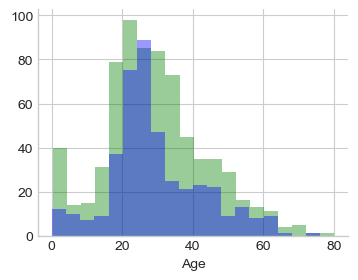

In [25]:
age=train_dataset[~train_dataset['Age'].isnull()]['Age']
fig = plt.figure(figsize=(4,3),dpi=100)
ax = fig.gca()
sns.distplot(age,kde=False,hist  =True,color ='green')
sns.distplot(full_dataset[full_dataset['Survived'].isnull()]['Age'],kde=False,hist  =True,color ='blue')
sns.despine()
plt.show()

In [26]:
full_dataset['AgeBand'] = pd.cut(full_dataset['Age'], 5)

In [27]:
age_dataset =full_dataset[~full_dataset['Survived'].isnull()]
age_dataset=age_dataset[['AgeBand', 'Survived','Sex']].groupby(['AgeBand','Sex'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
age_dataset 

,AgeBand,Sex,Survived
0,"(0.0902, 16.136]",female,0.6182
1,"(0.0902, 16.136]",male,0.4364
2,"(16.136, 32.102]",female,0.7244
3,"(16.136, 32.102]",male,0.1508
4,"(32.102, 48.068]",female,0.8077
5,"(32.102, 48.068]",male,0.1929
6,"(48.068, 64.034]",female,0.9200
7,"(48.068, 64.034]",male,0.1739
8,"(64.034, 80.0]",female,NaN
9,"(64.034, 80.0]",male,0.0909


In [28]:
full_dataset.loc[ (full_dataset['Age'] > 0 ) & (full_dataset['Age'] <= 16.136), 'Age'] = 0
full_dataset.loc[(full_dataset['Age'] > 16.136) & (full_dataset['Age'] <= 32.102), 'Age'] = 1
full_dataset.loc[(full_dataset['Age'] > 32.102)  & (full_dataset['Age'] <= 48.0685), 'Age'] = 2
full_dataset.loc[(full_dataset['Age'] > 48.068) & (full_dataset['Age'] <= 64.034), 'Age'] = 3
full_dataset.loc[ full_dataset['Age'] > 64.034, 'Age'] = 4

In [29]:
### combine sex and  age  
def combine_age_gender(age_sex):
    age,sex = age_sex
    if (age == 0) and (sex == 'female'):
        return 'BAND_0'
    elif (age == 0) and (sex == 'male'):
        return 'BAND_1'
    elif (age == 1) and (sex == 'female'):
        return 'BAND_2'
    elif (age == 1) and (sex == 'male'):
        return 'BAND_3'
    elif (age == 2) and (sex == 'female'):
        return 'BAND_4'
    elif (age == 2) and (sex == 'male'):
        return 'BAND_5'
    elif (age == 3) and (sex == 'female'):
        return 'BAND_6'
    elif (age == 3) and (sex == 'male'):
        return 'BAND_7'
    elif (age == 4) and (sex == 'female'):
        return 'BAND_8'
    elif (age == 4) and (sex == 'male'):
        return 'BAND_9'
    return 'No_BAND'  ## else remain it as unassigned
   
full_dataset['Age_with_Gender'] = full_dataset[['Age','Sex']].apply(combine_age_gender,axis =1)

In [30]:
def is_adult_male(age_sex):
    age,sex = age_sex
    if (age >21) and (sex == 'male'):
        return 1
    else: 
        return 0

    
full_dataset['Is_Adult_Male'] = full_dataset[['Age','Sex']].apply(is_adult_male,axis =1)
  

def is_adult_female(age_sex):
    age,sex = age_sex
    if (age >21) and (sex == 'female'):
        return 1
    else: 
        return 0

    
full_dataset['Is_Adult_Female'] = full_dataset[['Age','Sex']].apply(is_adult_female,axis =1)

def is_adult_female(age_sex):
    age,sex = age_sex
    if (age <=1) and (sex == 'female'):
        return 1
    else: 
        return 0

    
full_dataset['Is_Infant'] = full_dataset['Age'].map(lambda x: 1 if x <=1 else 0)
full_dataset['Is_Child'] = full_dataset['Age'].map(lambda x:  1 if 1 < x <=10 else 0)

In [31]:
full_dataset['Single'] = full_dataset['Family_Size'].map(lambda s: 1 if s == 1 else 0)
full_dataset['SmallF'] = full_dataset['Family_Size'].map(lambda s: 1 if  s == 2  else 0)
full_dataset['MedF']  = full_dataset['Family_Size'].map(lambda s: 1 if 3 <= s <= 4 else 0)
full_dataset['LargeF'] = full_dataset['Family_Size'].map(lambda s: 1 if s >= 5 else 0)

In [32]:
#deck_level =sorted(full_dataset['Deck_Level'].unique())
#deck_mapper ={key:value for value,key in enumerate(deck_level)}
#print(deck_mapper)
#full_dataset["Deck_Level"].replace(deck_mapper,inplace=True)

In [33]:
embarked =sorted(full_dataset['Embarked'].unique())
embarked_mapper ={key:value for value,key in enumerate(embarked)}
full_dataset["Embarked"].replace(embarked_mapper,inplace=True)

In [34]:
#title =sorted(full_dataset['Title'].unique())
#title_mapper ={key:value for value,key in enumerate(title)}
#full_dataset["Title"].replace(title_mapper,inplace=True)
 

In [35]:
def has_cabin(deck_level):
     
    if (deck_level =='X'):
        return 'No'
    else: 
        return 'Yes'

    
full_dataset['Has_Cabin'] = full_dataset['Deck_Level'].apply(has_cabin)
  

In [36]:
full_dataset["Fare"] = full_dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [37]:
full_dataset = pd.get_dummies(full_dataset, columns = ["Pclass"],prefix="Pc")

In [38]:
Ticket = []
for each_ticket in list(full_dataset['Ticket']):
    #print(each_ticket)
    each_ticket =str(each_ticket).upper()
    if not each_ticket.isdigit() :
        each_ticket=each_ticket.replace(".","").replace("/","").strip().split(' ')[0] 
        Ticket.append(each_ticket) #Take prefix
    else:
        Ticket.append("XXX")
full_dataset["Ticket"] = Ticket

In [39]:
full_dataset,full_dataset_ignore = one_hot_dataframe(full_dataset, ['Sex','Title','Deck_Level','Age_with_Gender'], replace=True)

In [40]:
full_dataset.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,SibSp,Survived,...,Deck_Level=T,Deck_Level=X,Sex=female,Sex=male,Title=Master,Title=Miss,Title=Mr,Title=Mrs,Title=Officer,Title=Other
0,1.0,XXX,2,2,1.9810,"Braund, Mr. Owen Harris",0,1,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,C85,0,2,4.2667,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,XXX,2,1,2.0700,"Heikkinen, Miss. Laina",0,3,0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,C123,2,2,3.9722,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,XXX,2,1,2.0857,"Allen, Mr. William Henry",0,5,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
features_drop = ['Age','AgeBand','Cabin','Name','PassengerId','Is_Adult_Male','Is_Adult_Female','Is_Infant', 'Is_Child','Family_Size','Has_Cabin'
                 ,'Ticket']
full_dataset = full_dataset.drop(features_drop, axis=1)

In [42]:
full_dataset.info()
#full_dataset['Has_Cabin'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 39 columns):
Embarked                  1309 non-null int64
Fare                      1309 non-null float64
Parch                     1309 non-null int64
SibSp                     1309 non-null int64
Survived                  891 non-null float64
Single                    1309 non-null int64
SmallF                    1309 non-null int64
MedF                      1309 non-null int64
LargeF                    1309 non-null int64
Pc_1                      1309 non-null uint8
Pc_2                      1309 non-null uint8
Pc_3                      1309 non-null uint8
Age_with_Gender=BAND_0    1309 non-null float64
Age_with_Gender=BAND_1    1309 non-null float64
Age_with_Gender=BAND_2    1309 non-null float64
Age_with_Gender=BAND_3    1309 non-null float64
Age_with_Gender=BAND_4    1309 non-null float64
Age_with_Gender=BAND_5    1309 non-null float64
Age_with_Gender=BAND_6    1309 non-null float64
Ag

In [43]:
Z

NameError: name 'Z' is not defined

In [52]:
train_dataset =full_dataset[full_dataset['Survived'].notnull()]
test_dataset =full_dataset[full_dataset['Survived'].isnull()]
#train_dataset["Survived"] = train_dataset["Survived"].astype("int")
train_dataset.drop(labels=["Survived"],axis = 1,inplace=True)
test_dataset.drop(labels=["Survived"],axis = 1,inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 4. Evaluate Algorithm - Random Forest
####  a) Split-out validation dataset
####  b) Test options and evaluation metric

In [44]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [ ]:
#train_dataset.columns.values
#fig, ax = plt.subplots(figsize=(10,20) )
#g = sns.heatmap(train_dataset[train_dataset.columns.values].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",ax =ax)


In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [47]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    plt.figure()
    plt.title("Validation Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [48]:
def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)
    plt.show()

In [53]:
kfold = StratifiedKFold(n_splits=5)
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
test_size = 0.25
seed = 2

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(train_dataset, train_y, test_size=test_size,random_state=seed)

In [54]:
def test_classifier(model,X,y,cv):
    clf = model.fit(X,y.values.ravel())
    result = clf.score(X,y.values)
    print ("Accuracy: {0:.3f}".format(result*100.0))

    train_sizes, train_scores, validation_scores = learning_curve(clf, X,y.values.ravel(),cv=cv)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    return clf,result
 

Accuracy: 95.808


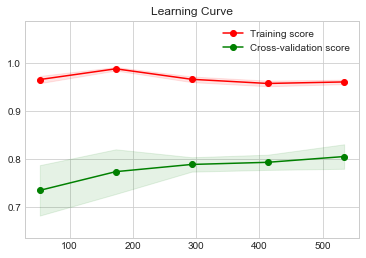

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc ,result = test_classifier(RandomForestClassifier(n_estimators=50, max_features=None),X_trainmodel,y_trainmodel,kfold)
print(rfc)


In [57]:
y_pred=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       131
          1       0.80      0.71      0.75        92

avg / total       0.81      0.81      0.80       223

Confusion matrix
[[115  16]
 [ 27  65]]


In [124]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(rfc, prefit=True,threshold=0.25)
reduced_train= model.transform(X_trainmodel)
reduced_validation =model.transform(X_val)
reduced_test =model.transform(test_dataset)
#X_trainmodel =reduced_train
#X_val =reduced_validation
#test_dataset =reduced_test
print(reduced_train.shape)
print(reduced_validation.shape)
print(reduced_test.shape)

(668, 7)
(223, 7)
(418, 7)


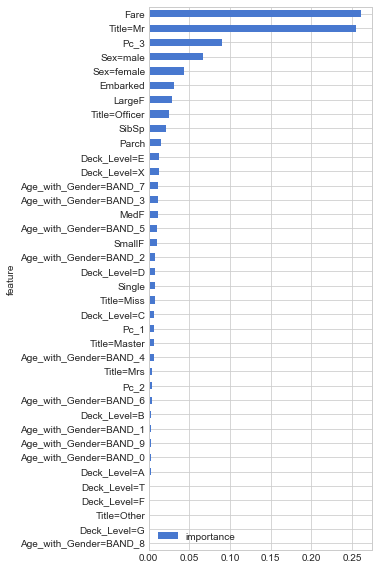

In [56]:
features = pd.DataFrame()
features['feature'] = X_trainmodel.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(4, 10))

In [ ]:
Z

###### Overfitting the model , tune it   it using  Grid Search CV

#### Did we  find the best parameters  lets check using validation curve

Accuracy: 83.533


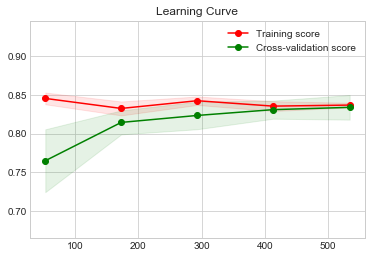

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=2, shrinking=True,
  tol=0.001, verbose=False)


In [61]:
from sklearn.svm import SVC
svc = SVC(random_state=2)
svc ,result = test_classifier(svc,X_trainmodel,y_trainmodel,kfold)
print(svc)

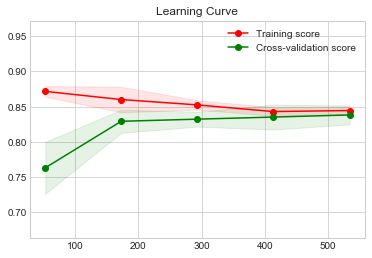

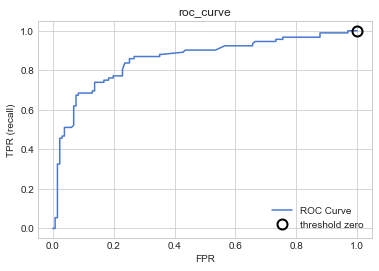

Classification report
             precision    recall  f1-score   support

          0       0.80      0.92      0.85       131
          1       0.85      0.67      0.75        92

avg / total       0.82      0.82      0.81       223

Confusion matrix
[[120  11]
 [ 30  62]]


In [63]:
def evaluvate_model(clf ,X_trainmodel, y_trainmodel,X_val,y_val): 
    clf.fit(X_trainmodel, y_trainmodel.values.ravel())
    train_sizes, train_scores, validation_scores = learning_curve(clf, 
                                                                  X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    plot_roc(X_val,y_val,clf)
    y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                               show_classification_report=True,
                               show_confusion_matrix=True, show_r2_score=False)

evaluvate_model(svc_best,X_trainmodel, y_trainmodel,X_val,y_val)

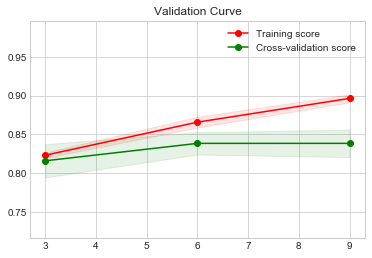

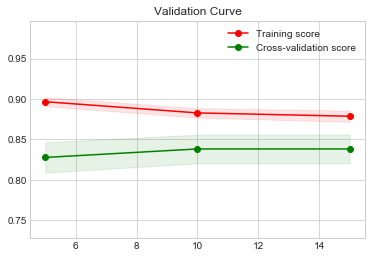

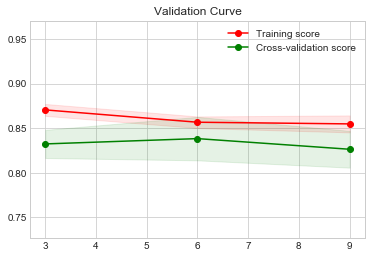

In [60]:

training_scores, validation_scores = validation_curve(rfc_best, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="max_depth", param_range=range(3, 12,3), cv=kfold)

plot_validation_curve(range(3, 12,3), training_scores, validation_scores)

training_scores, validation_scores = validation_curve(rfc_best, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="min_samples_split", param_range=range(5, 20,5), cv=kfold)

plot_validation_curve(range(5, 20,5), training_scores, validation_scores)

training_scores, validation_scores = validation_curve(rfc_best, X_trainmodel,y_trainmodel.values.ravel(),
                                                      param_name="min_samples_leaf", param_range=range(3,12,3), cv=kfold)
plot_validation_curve(range(3,12,3), training_scores, validation_scores)


In [62]:
def svc_param_selection(X, y, kfold):
    param_Cs = [0.001, 0.01, 0.1, 1, 10]
    param_gammas = [0.001, 0.01, 0.1, 1]
    param_kernels =['linear','rbf']
    param_grid = {'C': param_Cs, 'gamma' : param_gammas, 'kernel':param_kernels}
    grid_search = GridSearchCV(SVC(probability =True,decision_function_shape ='ovr'), param_grid, cv=kfold,)
    grid_search.fit(X, y.values.ravel())
    print("Best estimator:\n{}".format(grid_search.best_estimator_))
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_,grid_search.best_params_

svc_best,svc_best_params = svc_param_selection(X_trainmodel,y_trainmodel,kfold)


Best estimator:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.84


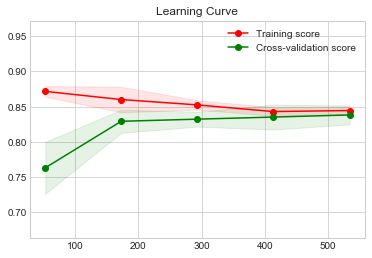

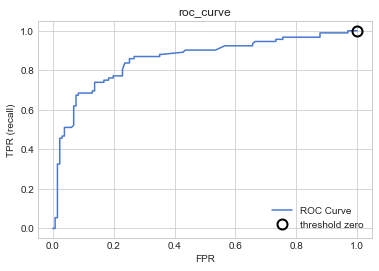

Classification report
             precision    recall  f1-score   support

          0       0.80      0.92      0.85       131
          1       0.85      0.67      0.75        92

avg / total       0.82      0.82      0.81       223

Confusion matrix
[[120  11]
 [ 30  62]]


In [63]:
def evaluvate_model(clf ,X_trainmodel, y_trainmodel,X_val,y_val): 
    clf.fit(X_trainmodel, y_trainmodel.values.ravel())
    train_sizes, train_scores, validation_scores = learning_curve(clf, 
                                                                  X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    plot_roc(X_val,y_val,clf)
    y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                               show_classification_report=True,
                               show_confusion_matrix=True, show_r2_score=False)

evaluvate_model(svc_best,X_trainmodel, y_trainmodel,X_val,y_val)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   34.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   50.1s finished


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.2, n_estimators=100, random_state=7)


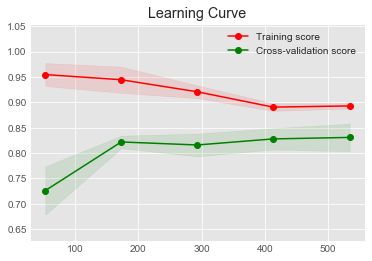

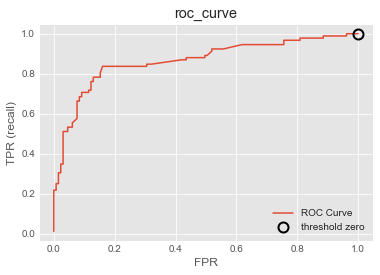

Classification report
             precision    recall  f1-score   support

          0       0.80      0.94      0.86       131
          1       0.88      0.66      0.76        92

avg / total       0.83      0.83      0.82       223

Confusion matrix
[[123   8]
 [ 31  61]]


In [66]:
# Adaboost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

 
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
}

dtc = DecisionTreeClassifier( class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt',
            max_leaf_nodes=None,min_samples_leaf=1,
            min_samples_split=10
            )
'''
max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10
            '''
ada_dtc = AdaBoostClassifier(dtc, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[100],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsada_dtc = GridSearchCV(ada_dtc,param_grid = ada_param_grid, cv=kfold, scoring=scorers,refit='precision_score', n_jobs= 4, verbose = 1)

gsada_dtc.fit(X_trainmodel, y_trainmodel.values.ravel())

ada_best = gsada_dtc.best_estimator_
print(ada_best)
evaluvate_model(ada_best,X_trainmodel, y_trainmodel,X_val,y_val)


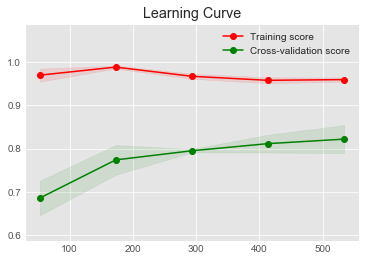

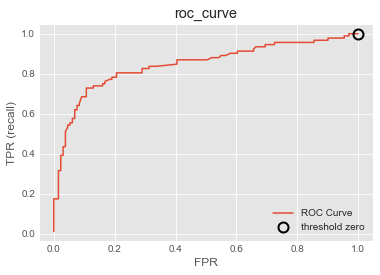

Classification report
             precision    recall  f1-score   support

          0       0.81      0.89      0.85       131
          1       0.82      0.70      0.75        92

avg / total       0.81      0.81      0.81       223

Confusion matrix
[[117  14]
 [ 28  64]]


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': 5, 'random_state': 2,
                   'min_samples_split': 5}

gbc =GradientBoostingClassifier(**original_params)
gbc.fit(X_trainmodel, y_trainmodel.values.ravel())
evaluvate_model(gbc,X_trainmodel, y_trainmodel,X_val,y_val)

In [69]:
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=None, max_leaf_nodes=4,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [118]:
parameter_grid = {"loss":["deviance"],
                  "learning_rate": [0.05, 0.01, 0.2],
                  "min_samples_split":[5 ],
                   "max_leaf_nodes":[4,6],
                  "max_depth":[3,5],
                  "max_features":["sqrt"],
                  "criterion": ["friedman_mse", ],
                  "subsample":[ 0.8,  0.9, ],
                  "n_estimators":[500]
                   
                  #"oob_score":[True]
                  #"class_weight":[{0: 0.61616, 1: 0.38384}]
                 }
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
}

gbc =GradientBoostingClassifier()
grid_search = GridSearchCV(gbc,param_grid = parameter_grid,verbose = 1,n_jobs =-1,
                           cv=kfold,scoring=scorers,refit='precision_score',)

grid_search.fit(X_trainmodel ,y_trainmodel.values.ravel())

gbc_best = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   37.3s finished


In [119]:
gbc_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=6,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

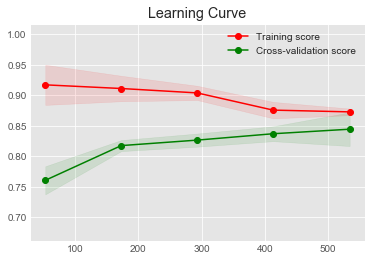

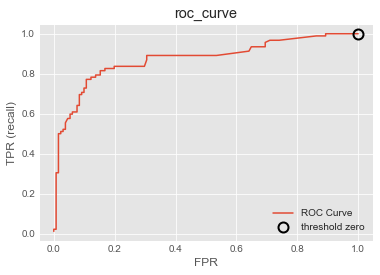

Classification report
             precision    recall  f1-score   support

          0       0.77      0.92      0.84       131
          1       0.85      0.61      0.71        92

avg / total       0.80      0.79      0.79       223

Confusion matrix
[[121  10]
 [ 36  56]]


In [120]:
evaluvate_model(gbc_best,X_trainmodel, y_trainmodel,X_val,y_val)

In [121]:
from sklearn.ensemble import VotingClassifier
vc_clf = VotingClassifier( estimators =[('rfc', rfc_best),('ada_boost',ada_best),
                                         ('svc_best',svc_best) ,
                                        ('gbc_best',gbc_best),
                                       ],voting='hard', n_jobs=4 )
vc_clf.fit(X_trainmodel, y_trainmodel.values.ravel())

#evaluvate_model(vc_clf,X_trainmodel, y_trainmodel,X_val,y_val)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_we...      presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=4, voting='hard', weights=None)

In [122]:
y_pred_result=vc_clf.predict(test_dataset)
FORMAT = '%Y%m%d%H%M%S'
timestamp=datetime.datetime.now().strftime(FORMAT)
filename ="submission_vc"+timestamp+"_out.csv"
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv(filename, index=False)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
